# NLP: extracting the jargon and ngrams from job description posts

The aim ot this exercise is to identify the possible jargon words and phrases used in job description from a number of different fields. To do this, it was necessary to compare the words and phrases with a reference set. In this case, the Reuters news articles was used as a background corpus to compare the job description text. 

The code has the following steps: 

- Prepare the job description dataset: tokenize the text and drop stopwords and numbers. A lemmatize text was used to identify words with the same root. 
- Fetch the Reuters files and apply the same process to the dataset. 
- Compare the processed tokens in the job description list with those tokens in the Reuters list to determine uncommon words. The result is a list of possible jargon words associated with job descriptions. Notices that the larger the number of files that you use in the Reuters corpus, the smaller the number of possible jargon words in the job description list.
- Take a look at the most common bigrams in both datasets to identify "popular phrases".

### 1. Import the data

In [ ]:
import nltk.data
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
nltk.download('punkt')
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dir_base = "./data/"

def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text
    
def read_directory_files(directory):
    file_texts = []
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_text = read_file(join(directory, f))
        print(file_text)
        file_texts.append({"file":f, "content": file_text })
    return file_texts
    
#list that contains all the files and their contents
#text_corpus = read_directory_files(dir_base)

In [ ]:
#sample
text_corpus[0]

{'content': "As a Materials Engineer (Manufacturing) (Metals), you will:\n\nProvide expert advice on and reviews various coin programs, manufacturing practices and equipment\nspecifications for process capabilities, suitability, and reliability potential. Performs analyses and tests and makes significant and innovative recommendations as to the practicability of established requirements; and develops standard methods and procedures that are utilized nationally. Determines when adjustments in coin production processes are necessary to improve cost, efficiency and/or product quality.\n\nProvide expert advice to senior managers and colleagues on broad strategies of chemical treatment methods,\nequipment and advanced technology, and process management and control strategies for optimizing complex\n\nchemical processing of coin blanks and surfaces for both circulation and proof coining at all Mint field offices.\n\nIndividually or in leading a technical team, resolves complex problems while

### 2. Process jobs description texts

In [ ]:
#Get "content" from all elements from list of dictionary and create single string
text0 = [i["content"] for i in text_corpus]
text = ''.join(text0) 

#define function for tokenizing and cleaning data
#We will use this function later, to process the Reuters corpus
def process_description(job_description_object):
    text_sentences = sentence_tokenizer.tokenize(job_description_object) 
    text_words = [treebank_tokenizer.tokenize(sentence) for sentence in text_sentences] 
    text_all_tokens = [word.lower() for sentence in text_words for word in sentence]
    
    #clean tokens
    stop_words = nltk.corpus.stopwords.words('english')
    preprocessed_words = [w for w in text_all_tokens if w not in stop_words and w.isalpha()]
    
    #Lemmatize
    from nltk.stem import WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word) for word in preprocessed_words]

#get processed text
all_job_description_words = process_description(text)
print(len(all_job_description_words))

3684


In [ ]:
#this code is not necessary if we use the above function
#all_job_description_words = []
#for job_description in text_corpus:
#    all_job_description_words.extend(process_description_(job_description))

### 3. Process Reuters corpus

In [ ]:
from nltk.corpus import reuters
nltk.download('reuters')

[nltk_data] Downloading package reuters to /Users/sandra/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
num_docs = len(reuters.fileids())
num_docs

10788

In [ ]:
#Get Reuters words
#files =reuters.fileids()[:25] #sample
#files =reuters.fileids()[:7000] 
files =reuters.fileids() #all
all_reuters_words = []

for doc_id in files:
    reuters_text = reuters.open(doc_id).read() 
    #Process reuters text with the same method as above
    clean_reuters_tokens = process_description(reuters_text) #multiple lists of tokens
    #get a single list of tokens
    for w in clean_reuters_tokens:
        all_reuters_words.append(w)

### 4. Get jargon words used in job descriptions

In [ ]:
#look for uncommon words between jobs and reuters
def get_uncommon(doc):
    uncommon_words = []
    for w in doc:
        if w not in all_reuters_words:
            if w not in uncommon_words: #avoid repetitions
                uncommon_words.append(w)
    return uncommon_words

In [ ]:
job_jargon = get_uncommon(all_job_description_words)

In [ ]:
print("Job jargon: ",len(job_jargon))
print("ratio: ",len(job_jargon)/len(all_job_description_words))

Job jargon:  201
ratio:  0.05456026058631922


In [ ]:
job_jargon.sort()
print(job_jargon)

['accomplishing', 'accreditation', 'adaptable', 'affectively', 'agility', 'aligning', 'ancc', 'answered', 'approachable', 'aprnvalidation', 'aspiration', 'assertive', 'assigning', 'assistanceabout', 'bpr', 'breadth', 'calculator', 'cgi', 'characterization', 'charting', 'clarksburg', 'click', 'coining', 'collaboration', 'collegiate', 'compassionate', 'concurrently', 'converse', 'coursework', 'credential', 'credentialing', 'customize', 'cutover', 'cws', 'dc', 'decimal', 'deploying', 'description', 'diploma', 'diplomaare', 'disability', 'discovering', 'disseminate', 'dod', 'dynamaps', 'email', 'embrace', 'emergent', 'empathetic', 'empower', 'enlightening', 'enlisting', 'enlistment', 'entrepreneurial', 'eps', 'ethical', 'excellence', 'faculty', 'familiarity', 'feedback', 'florist', 'footprint', 'fracture', 'fridaynew', 'fundraising', 'funny', 'gaithersburg', 'ged', 'gender', 'georgetown', 'glucose', 'google', 'governance', 'gpa', 'graduate', 'graduating', 'grammar', 'hopkins', 'http', 'hub

### 5. Compare job description bigrams vs reuters bigrams

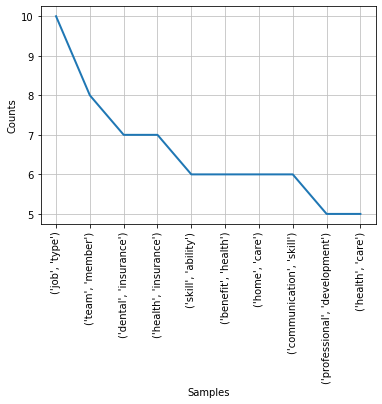

In [ ]:
#job description bigrams
job_bigrams = nltk.bigrams(all_job_description_words)
text_freq_bi = nltk.FreqDist(job_bigrams)
text_freq_bi.plot(10)

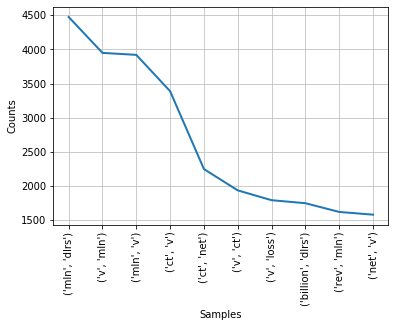

In [ ]:
#Reuters bigrams
reuters_bigrams = nltk.bigrams(all_reuters_words)
text_freq_bi = nltk.FreqDist(reuters_bigrams)
text_freq_bi.plot(10)

### 6. Further steps

This method is an approximation to get a list of possible jargon from the job description dataset. Some of the words were expected, such as: _adaptable, excellence, internship, proactive, reliability, tableau_. However, some words might not necessarily refer to jargon, for example: _georgetown_ and _gaithersburg_ refer to locations. Finally, if we take a look at the bigrams, we can see some phrases that are commmon in a job description:  _(job, type), (team, member), (communication, skill), (professional, development)_


**Further steps to improve the method:**

- We could tag the jargon tokens using Part-of-Speech tagging to identify verbs, nouns and adjectives used in the job description. 
- We could take a look at the frequencies of each token in the jargon list, to determine which words are the most common. 
- In the case of the Reuters bigrams, the results do not give us sufficient information. For example, the most common bigrams are _(mln, dlrs), (v, mln), (mln, v)_. We may need to clean the dataset to drop this types of terms. 
